<center>
    <h1> Project Title: <i>Sign Language Recognition Using ML</i> </h1>

In [1]:
import numpy as np
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from sklearn.metrics import accuracy_score,confusion_matrix
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get our training and test data
train = pd.read_csv('C:/Users/User/Downloads/sign_language_mnist/sign_mnist_train.csv')
test = pd.read_csv('C:/Users/User/Downloads/sign_language_mnist/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
labels = train['label'].values

unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

Text(0, 0.5, 'Count')

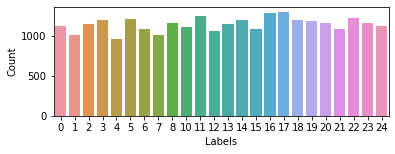

In [5]:
# Plot the quantities in each class
plt.figure(figsize = (6,2))
sns.countplot(x=labels)
plt.xlabel('Labels')
plt.ylabel('Count')

In [4]:
#  Drop Training Labels from our training data so we can separate it
train.drop('label',axis=1, inplace=True)

# Extract the image data from each row in our csv, remember its in a row of 784 columns
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [5]:
#hot one encode our labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(-0.5, 27.5, 27.5, -0.5)

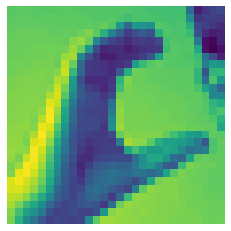

In [6]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))
plt.axis('off')

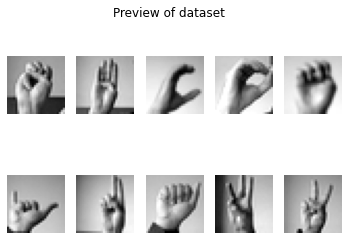

In [7]:
# Use OpenCv to view 10 random images from our training data
fig,axe=plt.subplots(2,5)
fig.suptitle('Preview of dataset')
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    if i>4:
        axe[(int(i/5)),i-5].imshow(input_im.reshape(28,28),cmap='gray')
        axe[(int(i/5)),i-5].axis('off')
    else:
        axe[(int(i/5)),i].imshow(input_im.reshape(28,28),cmap='gray')
        axe[(int(i/5)),i].axis('off')

(-0.5, 27.5, 27.5, -0.5)

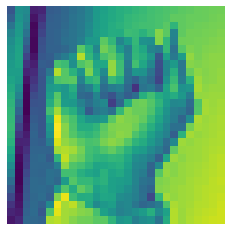

In [8]:
# Split our data into x_train, x_test, y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

# Start loading our tensorflow modules and define our batch size, etc
batch_size = 128
num_classes = 24
epoch = 10

# Scale our images
x_train = x_train/255
x_test = x_test/255

# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
plt.imshow(x_train[0].reshape(28,28))
plt.axis('off')

In [9]:
# Create our CNN Model
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes,activation='softmax'))

In [10]:
# Complie or Model
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [11]:
# Train our Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 65s 233ms/step - loss: 2.7309 - accuracy: 0.1636 - val_loss: 1.9001 - val_accuracy: 0.3933
Epoch 2/10
151/151 [==============================] - 31s 202ms/step - loss: 1.4369 - accuracy: 0.5253 - val_loss: 0.9340 - val_accuracy: 0.7027
Epoch 3/10
151/151 [==============================] - 32s 212ms/step - loss: 0.8521 - accuracy: 0.7063 - val_loss: 0.6513 - val_accuracy: 0.7952
Epoch 4/10
151/151 [==============================] - 31s 207ms/step - loss: 0.5873 - accuracy: 0.7977 - val_loss: 0.4113 - val_accuracy: 0.8638
Epoch 5/10
151/151 [==============================] - 32s 211ms/step - loss: 0.4280 - accuracy: 0.8524 - val_loss: 0.2715 - val_accuracy: 0.9173
Epoch 6/10
151/151 [==============================] - 32s 215ms/step - loss: 0.2946 - accuracy: 0.9016 - val_loss: 0.1783 - val_accuracy: 0.9514
Epoch 7/10
151/151 [==============================] - 30s 202ms/step - loss: 0.2206 - accuracy: 0.9241 - val_loss: 0.1502 - val_ac

In [19]:
# Save our model
model.save("sign_mnist_cnn_model2.h5")
print("Model Saved")

Model Saved


In [20]:
(ls,acc)=model.evaluate(x=x_test,y=y_test)
print('MODEL ACCURACY = {}%'.format(acc*100))

258/258 [==============================] - 4s 17ms/step - loss: 0.0338 - accuracy: 0.9934
MODEL ACCURACY = 99.34442043304443%


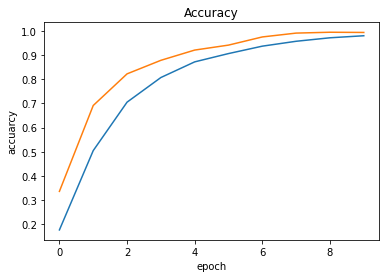

In [21]:
# View our training history graphically
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuarcy")
plt.show()

In [22]:
# Reshape our test data so that we can evaluate its performance on unseen data
test_labels = test['label']
test.drop('label',axis=1,inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

label_binarizer = LabelBinarizer()
test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

y_pred = model.predict(test_images)
#print(test_labels)
# Get our accuracy score
accuracy = accuracy_score(test_labels, y_pred.round())
print(f"Accuracy : {round(accuracy*100,2)}")

(7172, 28, 28, 1)

In [24]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 
                    13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y'}
    
    try:
        res = int(result)
        return classLabels[res]
    except: 
        return "Error"

## Testing on Image

1/1 [==============================] - 0s 40ms/step


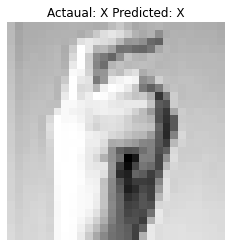

In [28]:
ex = 'X'
img = np.array(load_img('C:/Users/User/Downloads/sign_language_mnist/'+ex+'.png',
                        grayscale=True).resize((28, 28), Image.ANTIALIAS))

# predict from model
label = model.predict(img.reshape(1, 28, 28, 1))
inverted = argmax(label)

plt.title(f"Actaual: {ex} Predicted: {getLetter(argmax(label))}")
plt.axis('off')
plt.imshow(img.reshape(28, 28), cmap='gray');

1/1 [==============================] - 0s 22ms/step
0
1/1 [==============================] - 0s 45ms/step
1
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 33ms/step
3
1/1 [==============================] - 0s 29ms/step
4
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 49ms/step
6
1/1 [==============================] - 0s 31ms/step
7
1/1 [==============================] - 0s 36ms/step
9
1/1 [==============================] - 0s 34ms/step
10
1/1 [==============================] - 0s 75ms/step
11
1/1 [==============================] - 0s 35ms/step
12
1/1 [==============================] - 0s 58ms/step
13
1/1 [==============================] - 0s 47ms/step
14
1/1 [==============================] - 0s 89ms/step
15
1/1 [==============================] - 0s 46ms/step
16
1/1 [==============================] - 0s 29ms/step
17
1/1 [==============================] - 0s 37ms/step
18
1/1 [==============

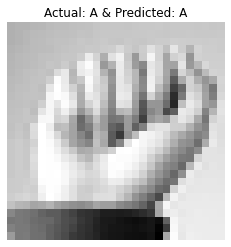

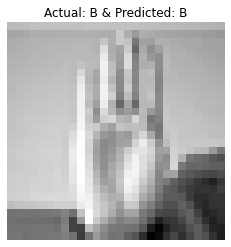

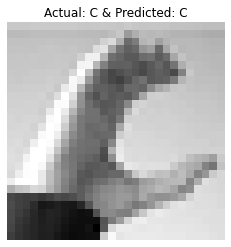

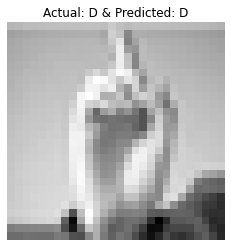

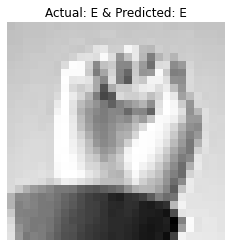

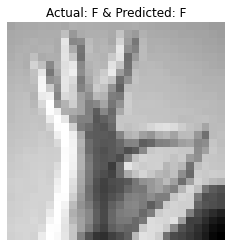

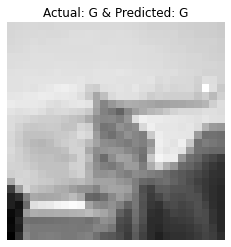

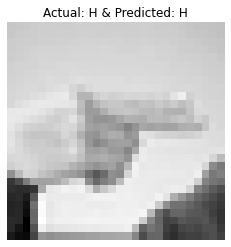

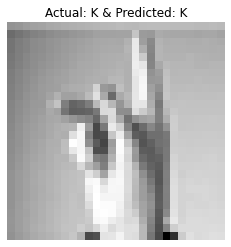

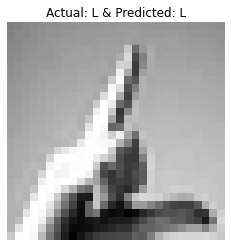

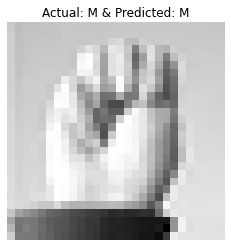

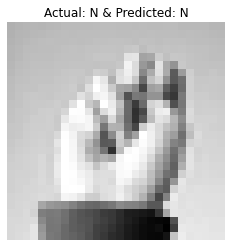

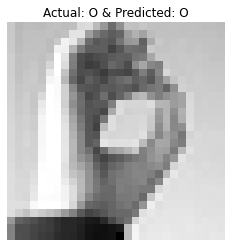

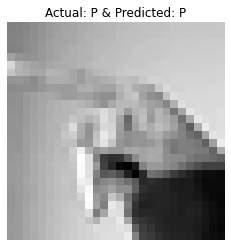

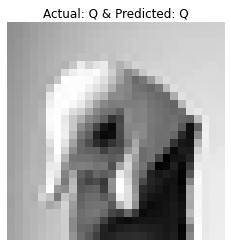

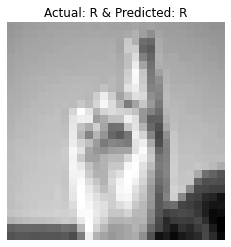

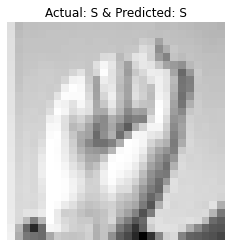

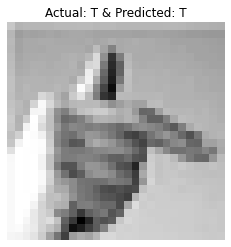

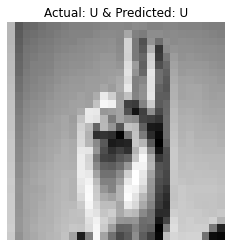

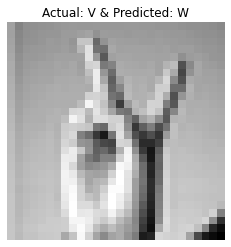

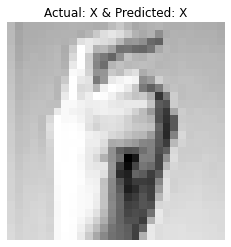

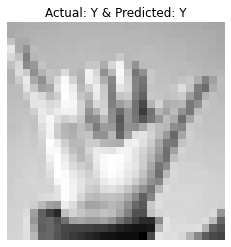

<Figure size 432x288 with 0 Axes>

In [44]:
alph = ['A','B','C','D','E','F','G','H','K','L','M','N','O','P','Q','R','S','T','U','V','X','Y']

for i in alph:
    #img = np.array(load_img('C:/Users/User/Downloads/sign_language_mnist/'+ i +'_test.jpg', 
    #               grayscale=True).resize((28, 28), Image.ANTIALIAS))
    img = np.array(load_img('C:/Users/User/Downloads/sign_language_mnist/'+ i +'.png', 
                            grayscale=True).resize((28, 28), Image.ANTIALIAS))

    # predict from model
    label = model.predict(img.reshape(1, 28, 28, 1))
    inverted = argmax(label)
    print(inverted)

    plt.title(f"Actual: {i} & Predicted: {getLetter(argmax(label))}")
    plt.axis('off')
    
    plt.imshow(img.reshape(28, 28), cmap='gray');
    plt.figure()

## Test on Actual Webcam Input

In [29]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame,1)
    
    roi = frame[100:400, 320:620]
    #cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)
    
    #cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    label = model.predict(roi.reshape(1, 28, 28, 1))
    inverted = argmax(label)
    predletter = str(getLetter(argmax(label)))
    
    cv2.putText(copy, predletter, (300,100), cv2.FONT_HERSHEY_COMPLEX,2, (0,255,0), 2)
    cv2.imshow('frame',copy)
    
    if cv2.waitKey(1)==13: #13 is the Enter key
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step
